# New Car Job

### Importation des librairies

In [1]:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

### Importation des données

In [2]:
df_cars = pd.read_csv('carData.csv')

In [3]:
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [35]:
df_cars.dropna(inplace = True) 

### Taille du jeu de données

In [4]:
df_cars.shape

(301, 9)

### Variables du jeux de données

In [5]:
df_cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

### Stastiques sur le jeu de données

In [6]:
df_cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Visualisation des stats

<AxesSubplot:ylabel='Frequency'>

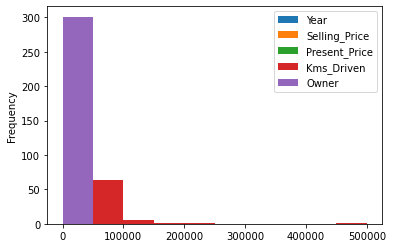

In [7]:
df_cars.plot.hist()

### Visualisation catplot

Cette visualisation est très utile lorsqu'on souhaite observer l'influence de variables catégoriques sur des variables numériques.

<Figure size 72000x72000 with 0 Axes>

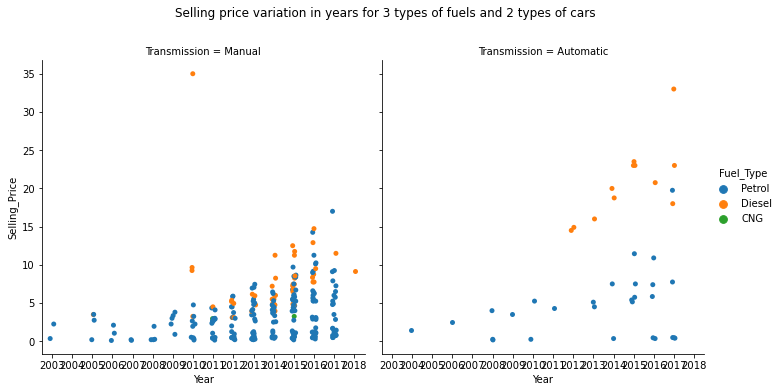

In [8]:
plt.figure(figsize=(1000,1000))
sns.catplot(x="Year", y="Selling_Price", hue='Fuel_Type', col="Transmission", data=df_cars)
plt.rcParams["xtick.labelsize"] = 6
plt.suptitle('Selling price variation in years for 3 types of fuels and 2 types of cars', y=1.08)
plt.show()

### Corrélation entre les variables

In [9]:
# Adding age column to dataset
df_cars['Age'] = 2020 - df_cars['Year']

In [10]:
# Dataset correlations
corrMatrix = df_cars.corr(method="pearson")
corrMatrix

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,-1.000000
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-1.000000,-0.236141,0.047584,0.524342,0.182104,1.000000


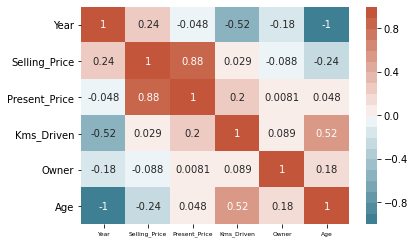

In [11]:
# Correlation matrix heatmap
sns.heatmap(corrMatrix, annot=True, cmap=sns.diverging_palette(220, 20, n=20))
plt.rcParams["xtick.labelsize"] = 10
plt.show()

Le tableau ci-dessus représente la matrice de corrélation entre les différentes variables du dataset. On observe une forte corrélation entre les variables **Selling_Price** et **Present_Price** (88%). De plus, les variables **Age** et **Kms_Driven** sont moyennement corrélées (52%). De même, **Year** est corrélée négativement à **Kms_Driven**. Les autres variables sont très peu corrélées entre elles.

La régression linaire consiste à construire une fonction prédictive d'une variable à partir de variables explicatives indépendantes entre elles. Une régression linaire peut être appliquée sur nos données à condition de sélectionner les variables indépendantes.

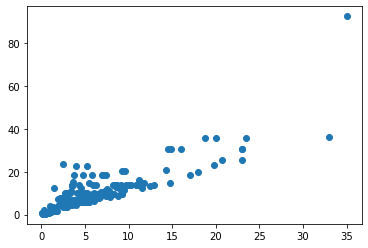

In [12]:
plt.scatter('Selling_Price', 'Present_Price', data=df_cars)

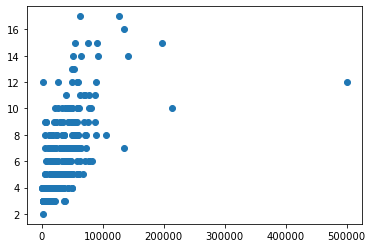

In [13]:
plt.scatter('Kms_Driven', 'Age', data=df_cars)

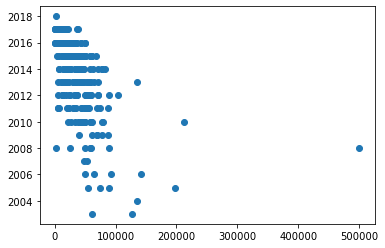

In [14]:
plt.scatter('Kms_Driven', 'Year', data=df_cars)

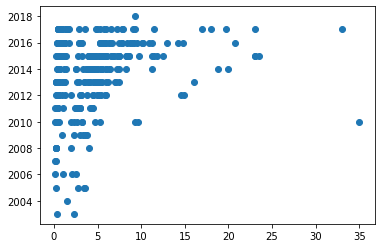

In [15]:
plt.scatter('Selling_Price', 'Year', data=df_cars)

### Linear Regression with Scipy

In [16]:
from scipy import stats

In [17]:
X = df_cars['Present_Price']
y = df_cars['Selling_Price']

In [18]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
print("slope: %f   intercept: %f" % (slope, intercept))

slope: 0.516849   intercept: 0.718527


In [19]:
print("R-squared: %f" % r_value**2)

R-squared: 0.772610


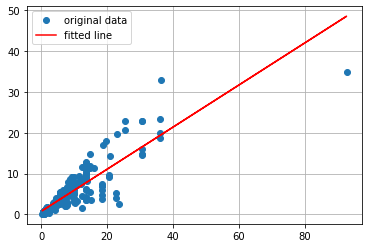

In [20]:
plt.plot(X, y, 'o', label='original data')
plt.plot(X, intercept + slope*X, 'r', label='fitted line')
plt.legend()
plt.grid()
plt.show()

### Linear Regression with Numpy

In [21]:
import numpy as np

In [28]:
# Assign input and target variable
X = np.array(df_cars['Present_Price'])
y = np.array(df_cars['Selling_Price'])

In [23]:
# Feature normalization
X = X/(np.max(X))

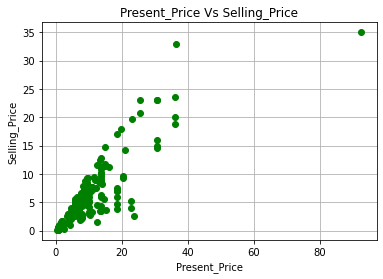

In [33]:
plt.plot(X,y,'go')
plt.ylabel('Selling_Price')
plt.xlabel('Present_Price')
plt.title('Present_Price Vs Selling_Price')
plt.grid()
plt.show()

In [34]:
def computecost(X, y, theta):
    a = 1/(2*m)
    b = np.sum(((x@theta)-y)**2)
    j = (a)*(b)
    return j

### Linear Regression with SKLearn

In [36]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [38]:
X = np.array(df_cars['Present_Price']).reshape(-1, 1) 
y = np.array(df_cars['Selling_Price']).reshape(-1, 1) 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [40]:
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.6723502480366776


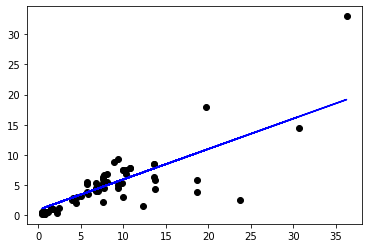

In [42]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='k') 
plt.plot(X_test, y_pred, color ='b') 
  
plt.show()